**1. Background Subtraction**

Saving IMG_2.png to IMG_2 (1).png


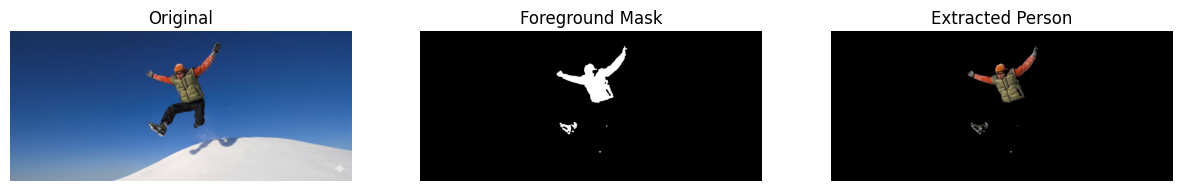

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
# Read image
img = cv2.imread('IMG_2.png')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define color ranges
lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])

lower_white = np.array([0, 0, 200])
upper_white = np.array([180, 30, 255])

lower_shadow = np.array([0, 0, 0])
upper_shadow = np.array([180, 255, 50])

# Create masks
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
mask_white = cv2.inRange(hsv, lower_white, upper_white)
mask_shadow = cv2.inRange(hsv, lower_shadow, upper_shadow)

# Combine all background masks
mask_bg = cv2.bitwise_or(mask_blue, mask_white)
mask_bg = cv2.bitwise_or(mask_bg, mask_shadow)

# Foreground mask
mask_fg = cv2.bitwise_not(mask_bg)

# Morphological cleaning
kernel = np.ones((5,5), np.uint8)
mask_fg = cv2.morphologyEx(mask_fg, cv2.MORPH_OPEN, kernel, iterations=1)
mask_fg = cv2.morphologyEx(mask_fg, cv2.MORPH_CLOSE, kernel, iterations=1)

# Extract only the person
result = cv2.bitwise_and(img, img, mask=mask_fg)

# Show results
plt.figure(figsize=(15,5))
plt.subplot(131); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original"); plt.axis('off')
plt.subplot(132); plt.imshow(mask_fg, cmap='gray'); plt.title("Foreground Mask"); plt.axis('off')
plt.subplot(133); plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB)); plt.title("Extracted Person"); plt.axis('off')
plt.show()


**2. Color-Based Segmentation**

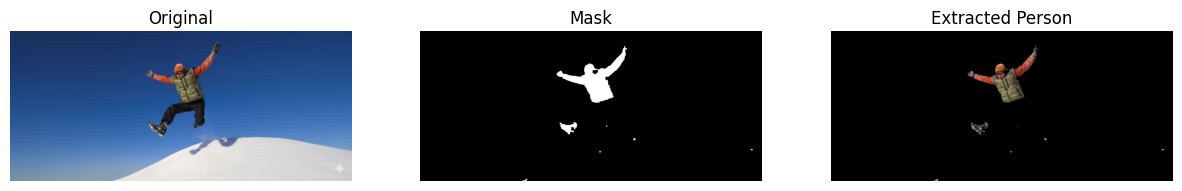

In [ ]:
img = cv2.imread('IMG_2.png')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define color ranges
lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])

lower_white = np.array([0, 0, 200])
upper_white = np.array([180, 20, 255])

lower_shadow = np.array([0, 0, 0])
upper_shadow = np.array([180, 255, 50])

# Create masks
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
mask_white = cv2.inRange(hsv, lower_white, upper_white)
mask_shadow = cv2.inRange(hsv, lower_shadow, upper_shadow)

# Combine all background masks
mask_bg = cv2.bitwise_or(mask_blue, mask_white)
mask_bg = cv2.bitwise_or(mask_bg, mask_shadow)

# Foreground mask
mask_fg = cv2.bitwise_not(mask_bg)

# Morphological cleaning
kernel = np.ones((5,5), np.uint8)
mask_fg = cv2.morphologyEx(mask_fg, cv2.MORPH_OPEN, kernel, iterations=1)
mask_fg = cv2.morphologyEx(mask_fg, cv2.MORPH_CLOSE, kernel, iterations=2)

# Extract only the person
result = cv2.bitwise_and(img, img, mask=mask_fg)

# Show results
plt.figure(figsize=(15,5))
plt.subplot(131); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original"); plt.axis('off')
plt.subplot(132); plt.imshow(mask_fg, cmap='gray'); plt.title("Mask"); plt.axis('off')
plt.subplot(133); plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB)); plt.title("Extracted Person"); plt.axis('off')
plt.show()


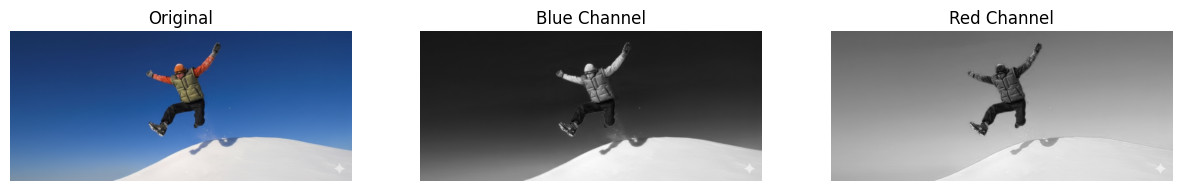

interactive(children=(IntSlider(value=0, description='B Low', max=255, step=5), IntSlider(value=255, descripti…

<function __main__.threshold_image(low_b, high_b, low_r, high_r)>

In [ ]:
import io
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab import files
from ipywidgets import interact
import ipywidgets as widgets

img = cv2.imread('IMG_2.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Step 3: Split channels
b = img_rgb[:, :, 0]
g = img_rgb[:, :, 1]
r = img_rgb[:, :, 2]

# Plot individual color channels
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.title("Original")
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(132)
plt.title("Blue Channel")
plt.imshow(b, cmap='gray')
plt.axis('off')

plt.subplot(133)
plt.title("Red Channel")
plt.imshow(r, cmap='gray')
plt.axis('off')
plt.show()

# Step 4: Function to adjust thresholds dynamically
def threshold_image(low_b, high_b, low_r, high_r):
    mask_b = cv2.inRange(b, low_b, high_b)
    mask_r = cv2.inRange(r, low_r, high_r)

    # Combine both masks
    mask = cv2.bitwise_and(mask_b, mask_r)

    # Convert boolean mask to uint8
    mask = mask.astype(np.uint8)

    # Invert mask to keep subset
    mask_inv = cv2.bitwise_not(mask)

    # Apply mask
    mask_clean = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_inv)

    # Apply morphological operations to clean up
    kernel = np.ones((5, 5), np.uint8)
    mask_clean = cv2.morphologyEx(mask_clean, cv2.MORPH_CLOSE, kernel)

    # Plot results
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.title("Mask")
    plt.imshow(mask, cmap='gray')
    plt.axis('off')

    plt.subplot(122)
    plt.title("Cleaned Image")
    plt.imshow(mask_clean)
    plt.axis('off')
    plt.show()

# Step 5: Interactive sliders
interact(threshold_image,
         low_b=widgets.IntSlider(min=0, max=255, step=5, value=0, description="B Low"),
         high_b=widgets.IntSlider(min=0, max=255, step=5, value=255, description="B High"),
         low_r=widgets.IntSlider(min=0, max=255, step=5, value=0, description="R Low"),
         high_r=widgets.IntSlider(min=0, max=255, step=5, value=255, description="R High"))
